# Entrega 1 - Etapa Pre-Procesamiento de Datos

El objetivo de esta primera entrega es que los participantes adquieran habilidades en la etapa de Pre-Procesamiento de Datos de la Metodología CRISP DM.

## Profesores

*   Dr. Ierache, Jorge
*   Dr. Becerra Martín
*   Ing. Sanz Diego

## Alumnos

* Rodríguez, Emanuel Antonio
* Romano, Jorge Darío
* Sandoval Vasquez, Juan Leandro
* Sierra, Nicolas Federico

## Actividades

Realizar en un archivo de Google Colab **(UNO POR CADA DATASET SELECCIONADO)**, **un proceso de análisis exploratorio de datos, visualización de datos, manejo de datos faltantes y valores atípicos (outliers)**.

Indicar **(COMO SECCIONES DE TEXTO)** las **decisiones tomadas en la elección de cada técnica** para cada una de los procesos solicitados y las **conclusiones obtenidas por el grupo luego de analizar los resultados obtenidos**.

A continuación, brindamos detalles de las actividades a realizar por cada proceso.

## Procesos

### Importaciones de librerías

In [ ]:
# Carga y manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Configuración visual
sns.set(style="whitegrid")
%matplotlib inline

### 1 - Análisis exploratorio de datos



* Recopilar y examinar el conjunto de datos proporcionado.
* Identificar las características clave de los datos, como variables numéricas, categóricas, etc.
* Identificar posibles problemas en los datos, como valores atípicos o datos faltantes.
*	Realizar una limpieza inicial de los datos, si es necesario.
*	Trabajar sobre variables categóricas.


#### a) Cargamos el dataset en un dataframe
* La recopilación de los datos se obtuvieron del Sitio: **Kaggle** -
Link de Datos: [FIFA 2021 Complete Player Dataset](https://www.kaggle.com/datasets/aayushmishra1512/fifa-2021-complete-player-data).
* A continuación se realiza una muestra parcial del contenido de datos:

In [ ]:
PATH_DATASET = 'FIFA21Complete.csv'
SEPARADOR = ";"
df = pd.read_csv(PATH_DATASET, sep = SEPARADOR)
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


#### b) Información general del dataset

In [ ]:
df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


#### c) Visualización de la cantidad de filas y columnas

In [ ]:
df.shape

(17981, 9)

El dataset cuenta con:
*   17.981 registros (Cantidad de jugadores de futbol)
*   9 columnas con informacion descriptiva de cada uno de los jugadores



#### d) Nombre de las columnas

In [ ]:
df.columns

Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')

La informacion que se posee del jugador es la siguiente:


* Id del Jugador
* Nombre
* Nacionalidad
* Posición
* Overall (Valoración global)
* Edad
* Hits (Cantidad de veces que ha sido buscado / consultado)
* Potential (Potencial futuro)
* Equipo



#### e) Tipos de datos

In [ ]:
df.dtypes

,0
player_id,int64
name,object
nationality,object
position,object
overall,int64
age,int64
hits,int64
potential,int64
team,object


Vemos que las columnas `player_id`, `overall`, `age`, `hits` y `potential` son variables numericas.

Las columnas `name`, `nationality`, `position` y `team` son de tipo de dato objeto.

**A futuro, habra que realizar un encoding para mapear los valores de estas variables a valores numericos para poder utilizar algunos modelos (O tomar alguna otra decision).**

#### f) Limpieza inicial de datos

Como vemos, las columnas `player_id` y `name` no son del todo utiles para el analisis de datos ya que son valores unicos (o muy pocos para el caso de nombre).

Por otro lado, la columna  `team` (que representa el club en el que se encontraba actualmente a la fecha que se creo este dataset) no tiene mucho sentido ya que seran mas o menos 22 jugadores (entre titulares y suplentes por cada equipo).

Un caso posible por que el nos convendria quedarnos con esta columna es que determinemos de que Nacionalidad hay mas jugadores en cierto club, pero como no es objeto de estudio, se tomo la decision de eliminarla.

Es por esto que decidimos eliminarlas de nuestro set de datos y asi evitamos "fugas de datos" o ruido innecesario.

In [ ]:
df = df.drop(['player_id', 'name', 'team'], axis=1)

#### g) Tratamiento de variables categoricas

Como vimos en el item e) las columnas `name` **(ya eliminada)**, `nationality`, `position` y `team` **(ya eliminada)** son de tipo de dato objeto.

##### Tratamiento de la variable `position`

Determinamos todas las posiciones de los jugadores que se encuentran en nuestro DataFrame

In [ ]:
pos_split = df['position'].str.split('|')
todas_pos = pos_split.explode().unique()
print("Posiciones únicas en el dataset:", todas_pos)

Posiciones únicas en el dataset: ['ST' 'CF' 'RW' 'LW' 'CAM' 'CB' 'GK' 'CM' 'CDM' 'LM' 'RB' 'RM' 'LB' 'LWB'
 'RWB']


Creamos las columnas binarias (multi-hot) de forma manual. Esto se realiza ya que en un registro de nuestro dataset, la posicion del jugador se encontraba de la forma ST|CF|RW y es por esto que con tecnimas como dummies no era posible su utilización.

Por lo tanto, creamos una columna para cada posicion, si ese jugador aparece en dicha posicion, se le asignara un uno (1), caso contrario, un cero (0)

In [ ]:
for pos in todas_pos:
    df[f'pos_{pos}'] = df['position'].apply(lambda s: int(pos in s.split('|')))

Y eliminamos la columna original

In [ ]:
df = df.drop(['position'], axis=1)

##### Tratamiento de la variable `nationality`

Este tratamiento se realizara en la seccion **3 - Datos Faltantes**, no se realiza aca ya que es necesario su analisis grafico en la seccion **2 - Visualizacion de Datos** para determinar una decisión.

#### Resultado parcial

Para finalizar, mostramos como quedo nuestro dataset hasta ahora

In [ ]:
df

,nationality,overall,age,hits,potential,pos_ST,pos_CF,pos_RW,pos_LW,pos_CAM,pos_CB,pos_GK,pos_CM,pos_CDM,pos_LM,pos_RB,pos_RM,pos_LB,pos_LWB,pos_RWB
0,Argentina,94,33,299,94,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Portugal,93,35,276,93,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Brazil,92,28,186,92,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,Netherlands,91,29,127,92,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Slovenia,91,27,47,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,Ecuador,56,21,0,64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17977,Ecuador,56,23,0,64,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17978,Venezuela,56,18,1,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17979,Venezuela,56,22,0,62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


En cuanto a los **valores atipicos**, **duplicados** o **verificacion de nulos** se llevaran a cabo en las siguientes etapas.

### 2 - Visualización de Datos

* Seleccionar las variables relevantes para visualizar.
* Utilizar gráficos adecuados para representar diferentes tipos de variables, como histogramas, diagramas de dispersión, diagramas de caja, etc.
* Explorar la relación entre diferentes variables mediante gráficos de dispersión o gráficos de correlación.
* Realizar análisis visual para identificar patrones o tendencias en los datos.


#### a) Análisis columna **`nationality`**

##### Cantidad de frecuencias de nacionalidades

Vemos la cantidad de apariciones de cada pais por Nacionalidad

In [ ]:
COLUMNA_NACIONALIDAD = 'nationality'
frecuencias_nacionalidad = df[COLUMNA_NACIONALIDAD].value_counts()
print(frecuencias_nacionalidad)

nationality
England      1496
Germany      1138
Spain        1055
Argentina     970
France        948
             ... 
Ethiopia        1
Gibraltar       1
Macau           1
Barbados        1
Nicaragua       1
Name: count, Length: 162, dtype: int64


##### Countplot general

Con este grafico de barras podemos ver cuantos jugadores se encuentran en diferentes paises.

Como la cantidad de paises son demasiadas para este grafico, solo listaremos los 10 paises mas relevantes.

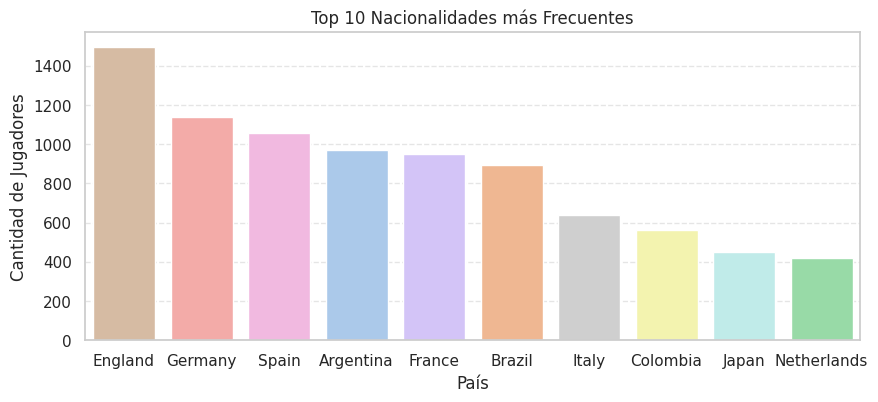

In [ ]:
top10_nacionalidades = df[COLUMNA_NACIONALIDAD].value_counts().nlargest(10).index.tolist()
df_top10_nacionalidades = df[df[COLUMNA_NACIONALIDAD].isin(top10_nacionalidades)]

plt.figure(figsize=(10,4))
sns.countplot(
    x=COLUMNA_NACIONALIDAD,
    hue=COLUMNA_NACIONALIDAD,
    data=df_top10_nacionalidades,
    palette='pastel',
    order=top10_nacionalidades
)

plt.title('Top 10 Nacionalidades más Frecuentes')
plt.xlabel('País')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### b) Análisis columna **`age`**

##### Cantidad de frecuencias de nacionalidades

In [ ]:
COLUMNA_EDAD = 'age'
frecuencias_edades = df[COLUMNA_EDAD].value_counts()
print(frecuencias_edades)

age
24    1436
23    1376
28    1360
26    1330
27    1303
25    1294
22    1289
21    1172
29    1146
30    1031
20     974
31     880
32     764
33     601
19     515
34     453
35     298
18     223
36     214
37     128
38      75
17      45
39      41
40      18
41       9
42       4
43       2
Name: count, dtype: int64


##### Countplot general

Con este gráfico de barras podemos visualizar que edad seria en la que un jugador profesional deberia tener.

Como la cantidad de edad son demasiadas para este grafico, solo listaremos las 10 edades mas relevantes.

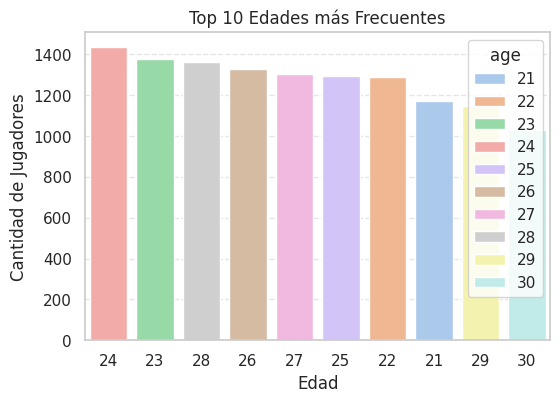

In [ ]:
top10_edades = df[COLUMNA_EDAD].value_counts().nlargest(10).index.tolist()
df_top10_edades = df[df[COLUMNA_EDAD].isin(top10_edades)]

plt.figure(figsize=(6,4))
sns.countplot(
    x=COLUMNA_EDAD,
    hue=COLUMNA_EDAD,
    data=df_top10_edades,
    palette='pastel',
    order=top10_edades
)

plt.title('Top 10 Edades más Frecuentes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Boxplot general de la variable predictora Edad

Mediante este grafico podemos detectar los posibles outliers.

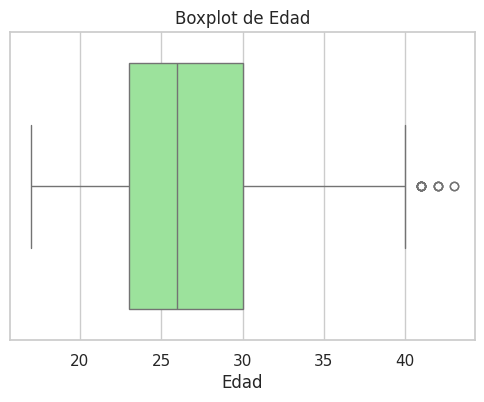

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df[COLUMNA_EDAD], color='lightgreen')
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
Q1 = df[COLUMNA_EDAD].quantile(0.25)
Q3 = df[COLUMNA_EDAD].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df[COLUMNA_EDAD] < limite_inferior) | (df[COLUMNA_EDAD] > limite_superior)]

print(f'Cantidad de outliers en Edad: {len(outliers)}')

Cantidad de outliers en Edad: 15


##### Histograma (KDE) de la distribucion completa de edad

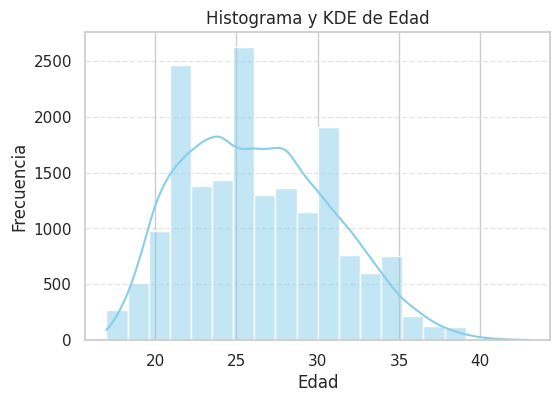

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df[COLUMNA_EDAD], bins=20, kde=True, color='skyblue')
plt.title('Histograma y KDE de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Con esto podremos ver de forma cuantitativa cuantos jugadores hay en cada rango de edad y ademas determinar si la variable es normal, sesgada a la derecha/izquierda o multimodal.

#### b) Análisis columna **`overall`**

##### Cantidad de frecuencias de overall

In [ ]:
COLUMNA_OVERALL = 'overall'
frecuencias_overall = df[COLUMNA_OVERALL].value_counts()
print(frecuencias_overall)

overall
66    1236
65    1229
67    1215
64    1178
68    1139
63    1062
69     972
70     954
62     905
71     822
72     820
60     769
61     743
73     630
74     589
59     583
58     512
75     501
57     469
76     363
77     288
78     252
79     180
80     141
81     100
82      88
83      67
84      41
85      34
86      26
87      20
56      18
88      13
89       9
90       5
91       5
93       1
92       1
94       1
Name: count, dtype: int64


##### Countplot general

Con este gráfico de barras podemos visualizar que overall tiene un jugador profesional.

Como la cantidad de overalls son demasiadas para este grafico, solo listaremos los 10 overall mas relevantes.

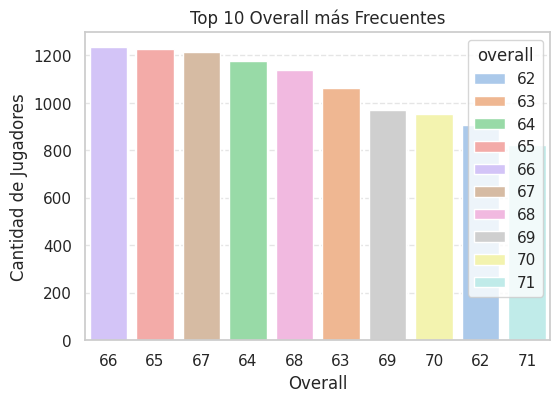

In [ ]:
top10_overall = df[COLUMNA_OVERALL].value_counts().nlargest(10).index.tolist()
df_top10_overall = df[df[COLUMNA_OVERALL].isin(top10_overall)]

plt.figure(figsize=(6,4))
sns.countplot(
    x=COLUMNA_OVERALL,
    hue=COLUMNA_OVERALL,
    data=df_top10_overall,
    palette='pastel',
    order=top10_overall
)

plt.title('Top 10 Overall más Frecuentes')
plt.xlabel('Overall')
plt.ylabel('Cantidad de Jugadores')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Boxplot general de la variable Overall

Mediante este grafico podemos detectar los posibles outliers.

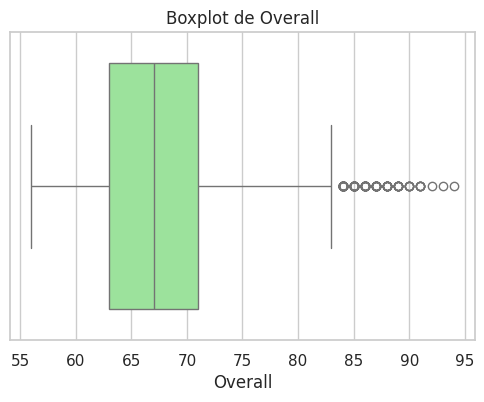

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df[COLUMNA_OVERALL], color='lightgreen')
plt.title('Boxplot de Overall')
plt.xlabel('Overall')
plt.show()

In [ ]:
Q1 = df[COLUMNA_OVERALL].quantile(0.25)
Q3 = df[COLUMNA_OVERALL].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df[COLUMNA_OVERALL] < limite_inferior) | (df[COLUMNA_OVERALL] > limite_superior)]

print(f'Cantidad de outliers en Overall: {len(outliers)}')

Cantidad de outliers en Overall: 156


##### Histograma (KDE) de la distribucion completa de overall

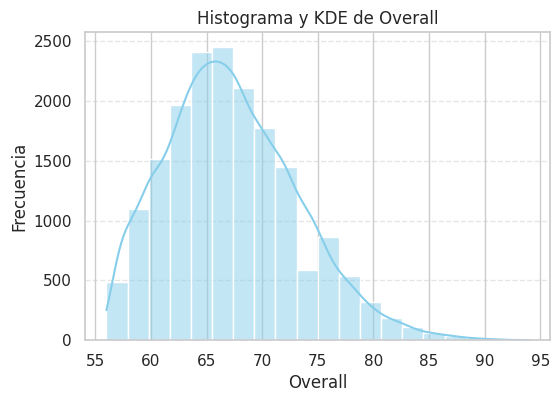

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df[COLUMNA_OVERALL], bins=20, kde=True, color='skyblue')
plt.title('Histograma y KDE de Overall')
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Con esto podremos ver de forma cuantitativa cuantos jugadores se encuentra en determinado overall y ademas determinar si la variable es normal, sesgada a la derecha/izquierda o multimodal.

##### Matriz de Correlación

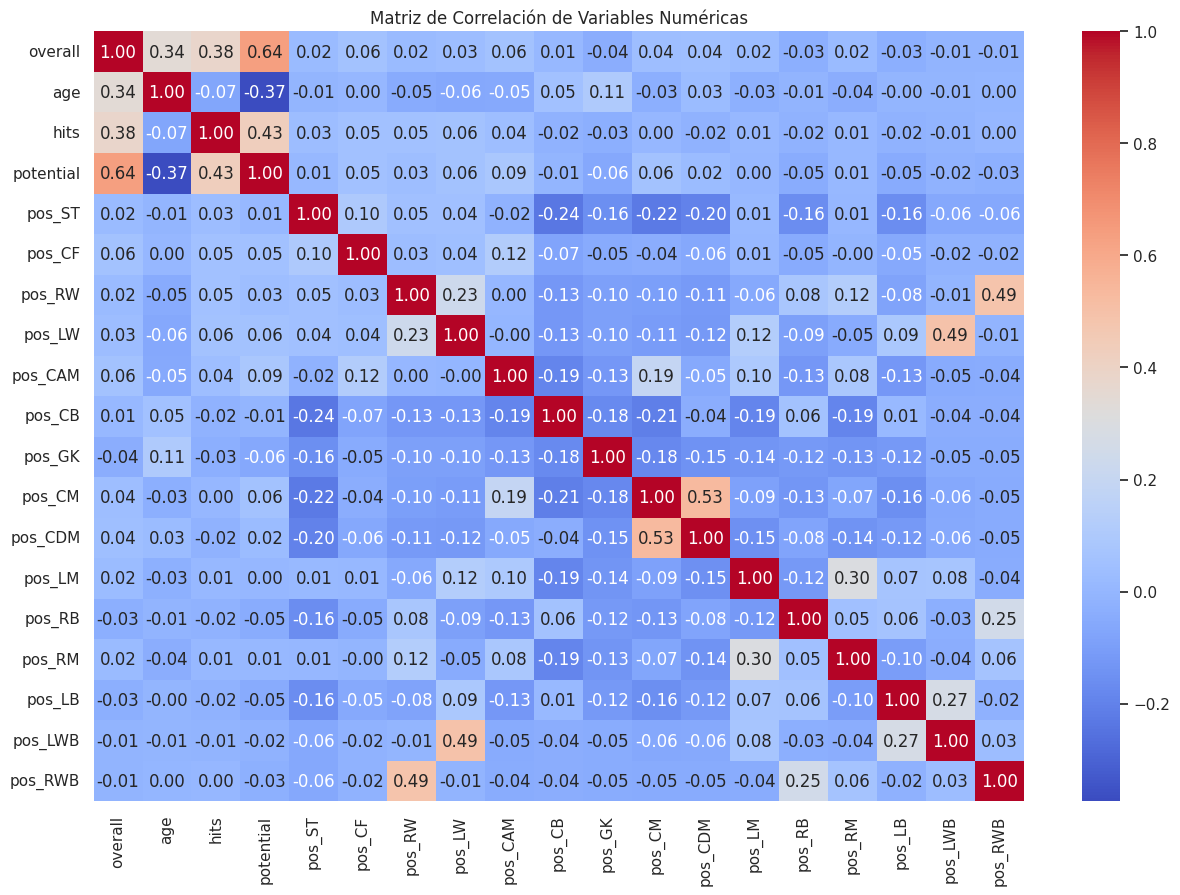

In [ ]:
numericas = df.select_dtypes(include='number').columns.tolist()

corr = df[numericas].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### 3 - Datos faltantes y/o Valores Atípicos (Outliers)

*	Identificar y evaluar la cantidad de datos faltantes (y/o Valores Atípicos (Outliers)) en el conjunto de datos.
*	Determinar la estrategia para manejar los datos faltantes, como el imputado de valores o la eliminación de filas o columnas con datos faltantes.
*	Aplicar la estrategia elegida para completar o eliminar los datos faltantes.
*	Validar y verificar la integridad de los datos después del tratamiento de datos faltantes.


#### a) Verificación de datos faltantes / valores nulos

In [ ]:
df.isna().sum()/df.shape[0]*100

,0
nationality,0.0
overall,0.0
age,0.0
hits,0.0
potential,0.0
pos_ST,0.0
pos_CF,0.0
pos_RW,0.0
pos_LW,0.0
pos_CAM,0.0


Podemos observar que **ninguna de las variables tienen valores nulos**, por lo que no habra que realizar imputaciones de este tipo.

#### b) Verificación de valores duplicados

In [ ]:
df.duplicated().sum()

np.int64(223)

El dataset no cuenta con registros duplicados

#### c) Eliminacion de filas o columnas

Para el caso de eliminacion de filas / columnas se realizo el Paso 1 - Limpieza de Datos

##### Tratamiento de la columna **`nationality`**

Como vimos en el grafico, solo vamos a quedarnos con las 10 nacionalidades con mas frecuencias del set de datos, para asi luego tratar esta variable categorica.

A partir del onceavo país imputaremos como valor 'Otro' para reducir la cardinalidad al realizar el tratamiento.

In [ ]:
top10_nacionalidades = df['nationality'].value_counts().nlargest(10).index.tolist()

df['nationality'] = df['nationality'].apply(lambda x: x if x in top10_nacionalidades else 'Otro')

print(df['nationality'].value_counts())

df = pd.get_dummies(df, columns=['nationality'], prefix='nac')

nationality
Otro           9416
England        1496
Germany        1138
Spain          1055
Argentina       970
France          948
Brazil          894
Italy           637
Colombia        561
Japan           448
Netherlands     418
Name: count, dtype: int64


#### d) Imputacion de valores outliers

##### Tratamiento de la columna **`age`**

Para el caso de edades, vamos a imputar los valores atipicos por la media.

* Calculamos nuevamente Q1, Q3 e IQR sobre la columna Edad.
* Creamos un booleano que marque los “no outliers” (edad dentro del rango aceptable)
* Y luego calculamos la media de Edad usando únicamente esos valores no atípicos
* Para finalizar, reemplazamos todos los outliers (<limite_inferior o >limite_superior) por esa media.

In [ ]:
Q1 = df[COLUMNA_EDAD].quantile(0.25)
Q3 = df[COLUMNA_EDAD].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

mascara_no_outlier = (df[COLUMNA_EDAD] >= limite_inferior) & (df[COLUMNA_EDAD] <= limite_superior)
media_no_atipicos = int(round(df.loc[mascara_no_outlier, COLUMNA_EDAD].mean()))

df.loc[df[COLUMNA_EDAD] <  limite_inferior, COLUMNA_EDAD] = media_no_atipicos
df.loc[df[COLUMNA_EDAD] >  limite_superior, COLUMNA_EDAD] = media_no_atipicos

Verificamos que ya no hay outliers

In [ ]:
nuevos_outliers = df[(df['age'] <  (Q1 - 1.5 * IQR)) | (df['age'] >  (Q3 + 1.5 * IQR))]
print(f'Outliers restantes: {len(nuevos_outliers)} (debería ser 0)')

Outliers restantes: 0 (debería ser 0)


#### Resultado parcial

Para finalizar, mostramos como quedo nuestro dataset hasta ahora

In [ ]:
df

,overall,age,hits,potential,pos_ST,pos_CF,pos_RW,pos_LW,pos_CAM,pos_CB,...,nac_Brazil,nac_Colombia,nac_England,nac_France,nac_Germany,nac_Italy,nac_Japan,nac_Netherlands,nac_Otro,nac_Spain
0,94,33,299,94,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,93,35,276,93,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
2,92,28,186,92,0,0,0,1,1,0,...,True,False,False,False,False,False,False,False,False,False
3,91,29,127,92,0,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
4,91,27,47,93,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,56,21,0,64,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17977,56,23,0,64,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17978,56,18,1,68,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
17979,56,22,0,62,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
